In [23]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym
import matplotlib.pyplot as plt

from ikamoana.utils.feedinghabitatutils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish, IkaFishDebug
from ikamoana.utils import fieldToDataArray, convertToMeters

In [2]:
configuration_filepath = "./../data/ikamoana_config/IkaSim_Example_Fish_025_30.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [4]:
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:348: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),


In [ ]:
# my_sim.oceanToNetCDF(to_dataset=True)

In [18]:
diff_y_ika = fieldToDataArray(my_sim.ocean.Ky)[:5]
diff_y_sea = seapodymFieldConstructor('../data/SEAPODYM_data/output/po_freeglorys_0.25x30d_1998_2019/skj_diffusion.dym')
diff_y_sea = diff_y_sea.loc[:,50.5:-39.5,119.5:289.5]
diff_y_sea = convertToMeters(diff_y_sea, timestep=30*24*60*60, square=True)

In [26]:
diff_y_ika.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... 49.25 49.5 49.75 50.0
  * lon      (lon) float32 120.0 120.2 120.5 120.8 ... 289.2 289.5 289.8 290.0

In [27]:
diff_y_sea.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16
  * lat      (lat) float32 50.5 50.25 50.0 49.75 ... -38.75 -39.0 -39.25 -39.5
  * lon      (lon) float32 119.5 119.8 120.0 120.2 ... 288.8 289.0 289.2 289.5

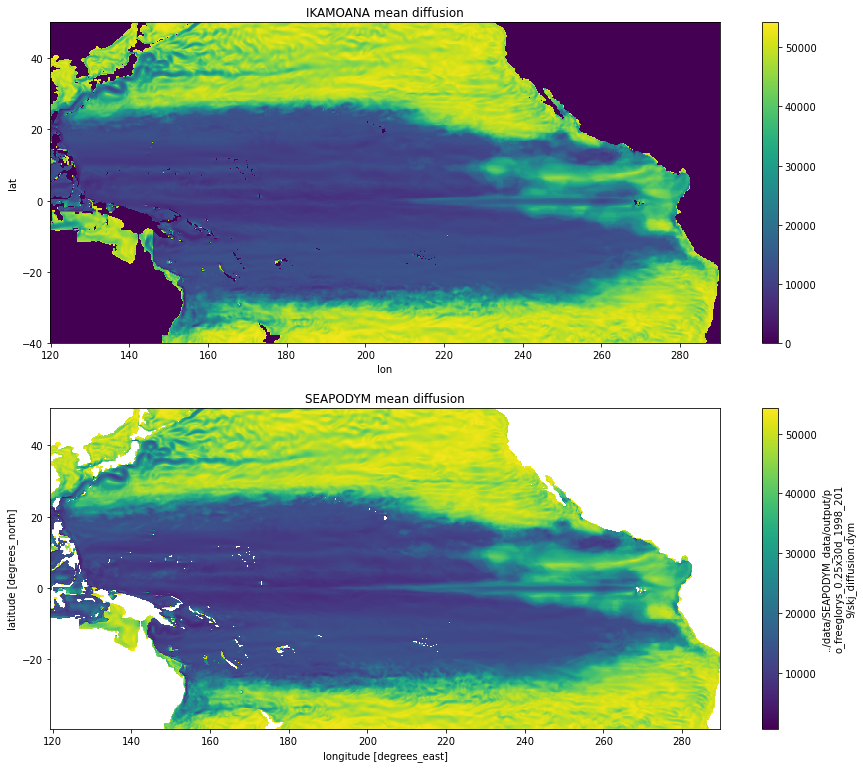

In [24]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(15,13))

abs(diff_y_ika).mean(axis=0).plot(ax=ax1)
abs(diff_y_sea).mean(axis=0).plot(ax=ax2)

ax1.set_title("IKAMOANA mean diffusion")
ax2.set_title("SEAPODYM mean diffusion")

plt.show()